<a href="https://colab.research.google.com/github/dduygaucho/london-bike-sharing/blob/main/London_bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pandas.plotting import register_matplotlib_converters
from tensorflow import keras
from matplotlib import rc, rcParams
%matplotlib inline
RANDOM_SEED = 42
os.getcwd()

'/content'

In [2]:
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

In [3]:
!git clone https://github.com/dduygaucho/london-bike-sharing.git

fatal: destination path 'london-bike-sharing' already exists and is not an empty directory.


In [4]:
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Data

The goal is to predict the number of future bike shares in London given its historical data of bike shares



## Features/Columns:

*   timestamp - timestamp field for grouping the data
*   cnt - the count of a new bike shares


*   t1 - real temperature in C

*   t2 - temperature in C “feels like”

*   hum - humidity in percentage
*   wind_speed - wind speed in km/h


*   weather_code - category of the weather


*   is_holiday - boolean field - 1 holiday / 0 non holiday

*   is_weekend - boolean field - 1 if the day is weekend

*   season - category field meteorological 
*   seasons: 0-spring ; 1-summer; 2-fall; 3-winter.









In [5]:
df = pd.read_csv('/content/london-bike-sharing/london_merged.csv', parse_dates= ['timestamp'], index_col= ['timestamp'])
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [7]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


# Data Exploration

1. Bike shares vs time 

There is a significant increase in the number of bike shares in 2015; however, the number of bike shares starts to drop gradually

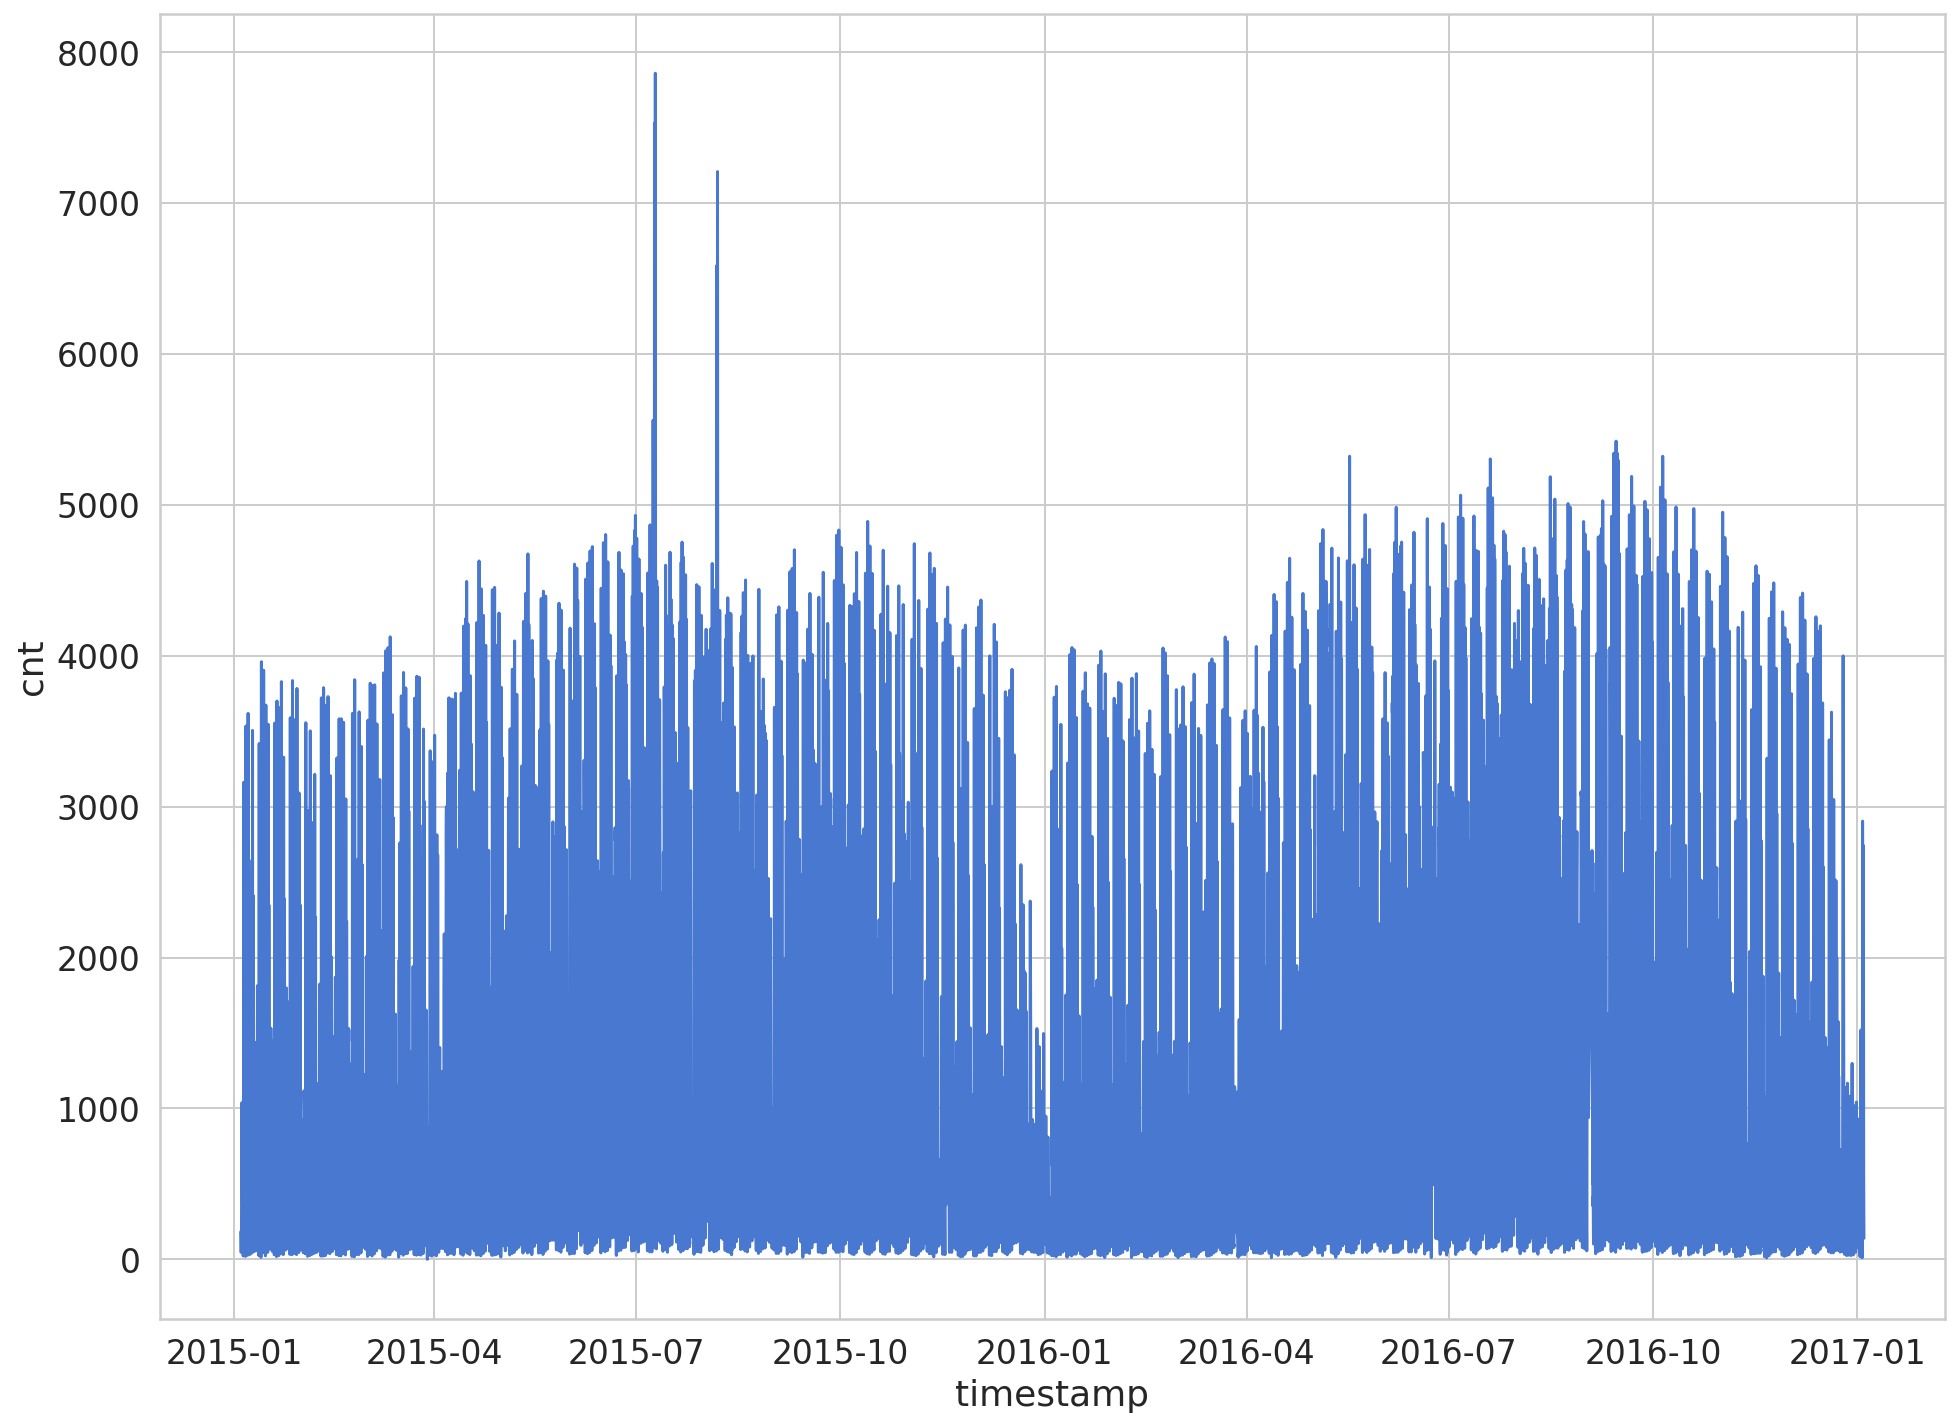

In [8]:
# plt.plot(df['cnt'])
plt.figure(figsize = (16,12))
sns.lineplot(x = df.index, y = 'cnt', data = df)

2. Bike shares over time (monthly)

Throughout the 12-month period, while not many people use this service at the beginning and at the end the year (the figure is the lowest in late December - January), there is an exponential growth of users between January and September, reaching a spike in October.

Therefore, it is concluded that most people favor using bike shares in the middle of the year, which fits the assumption that the weather is dry and humid at this period of the year.

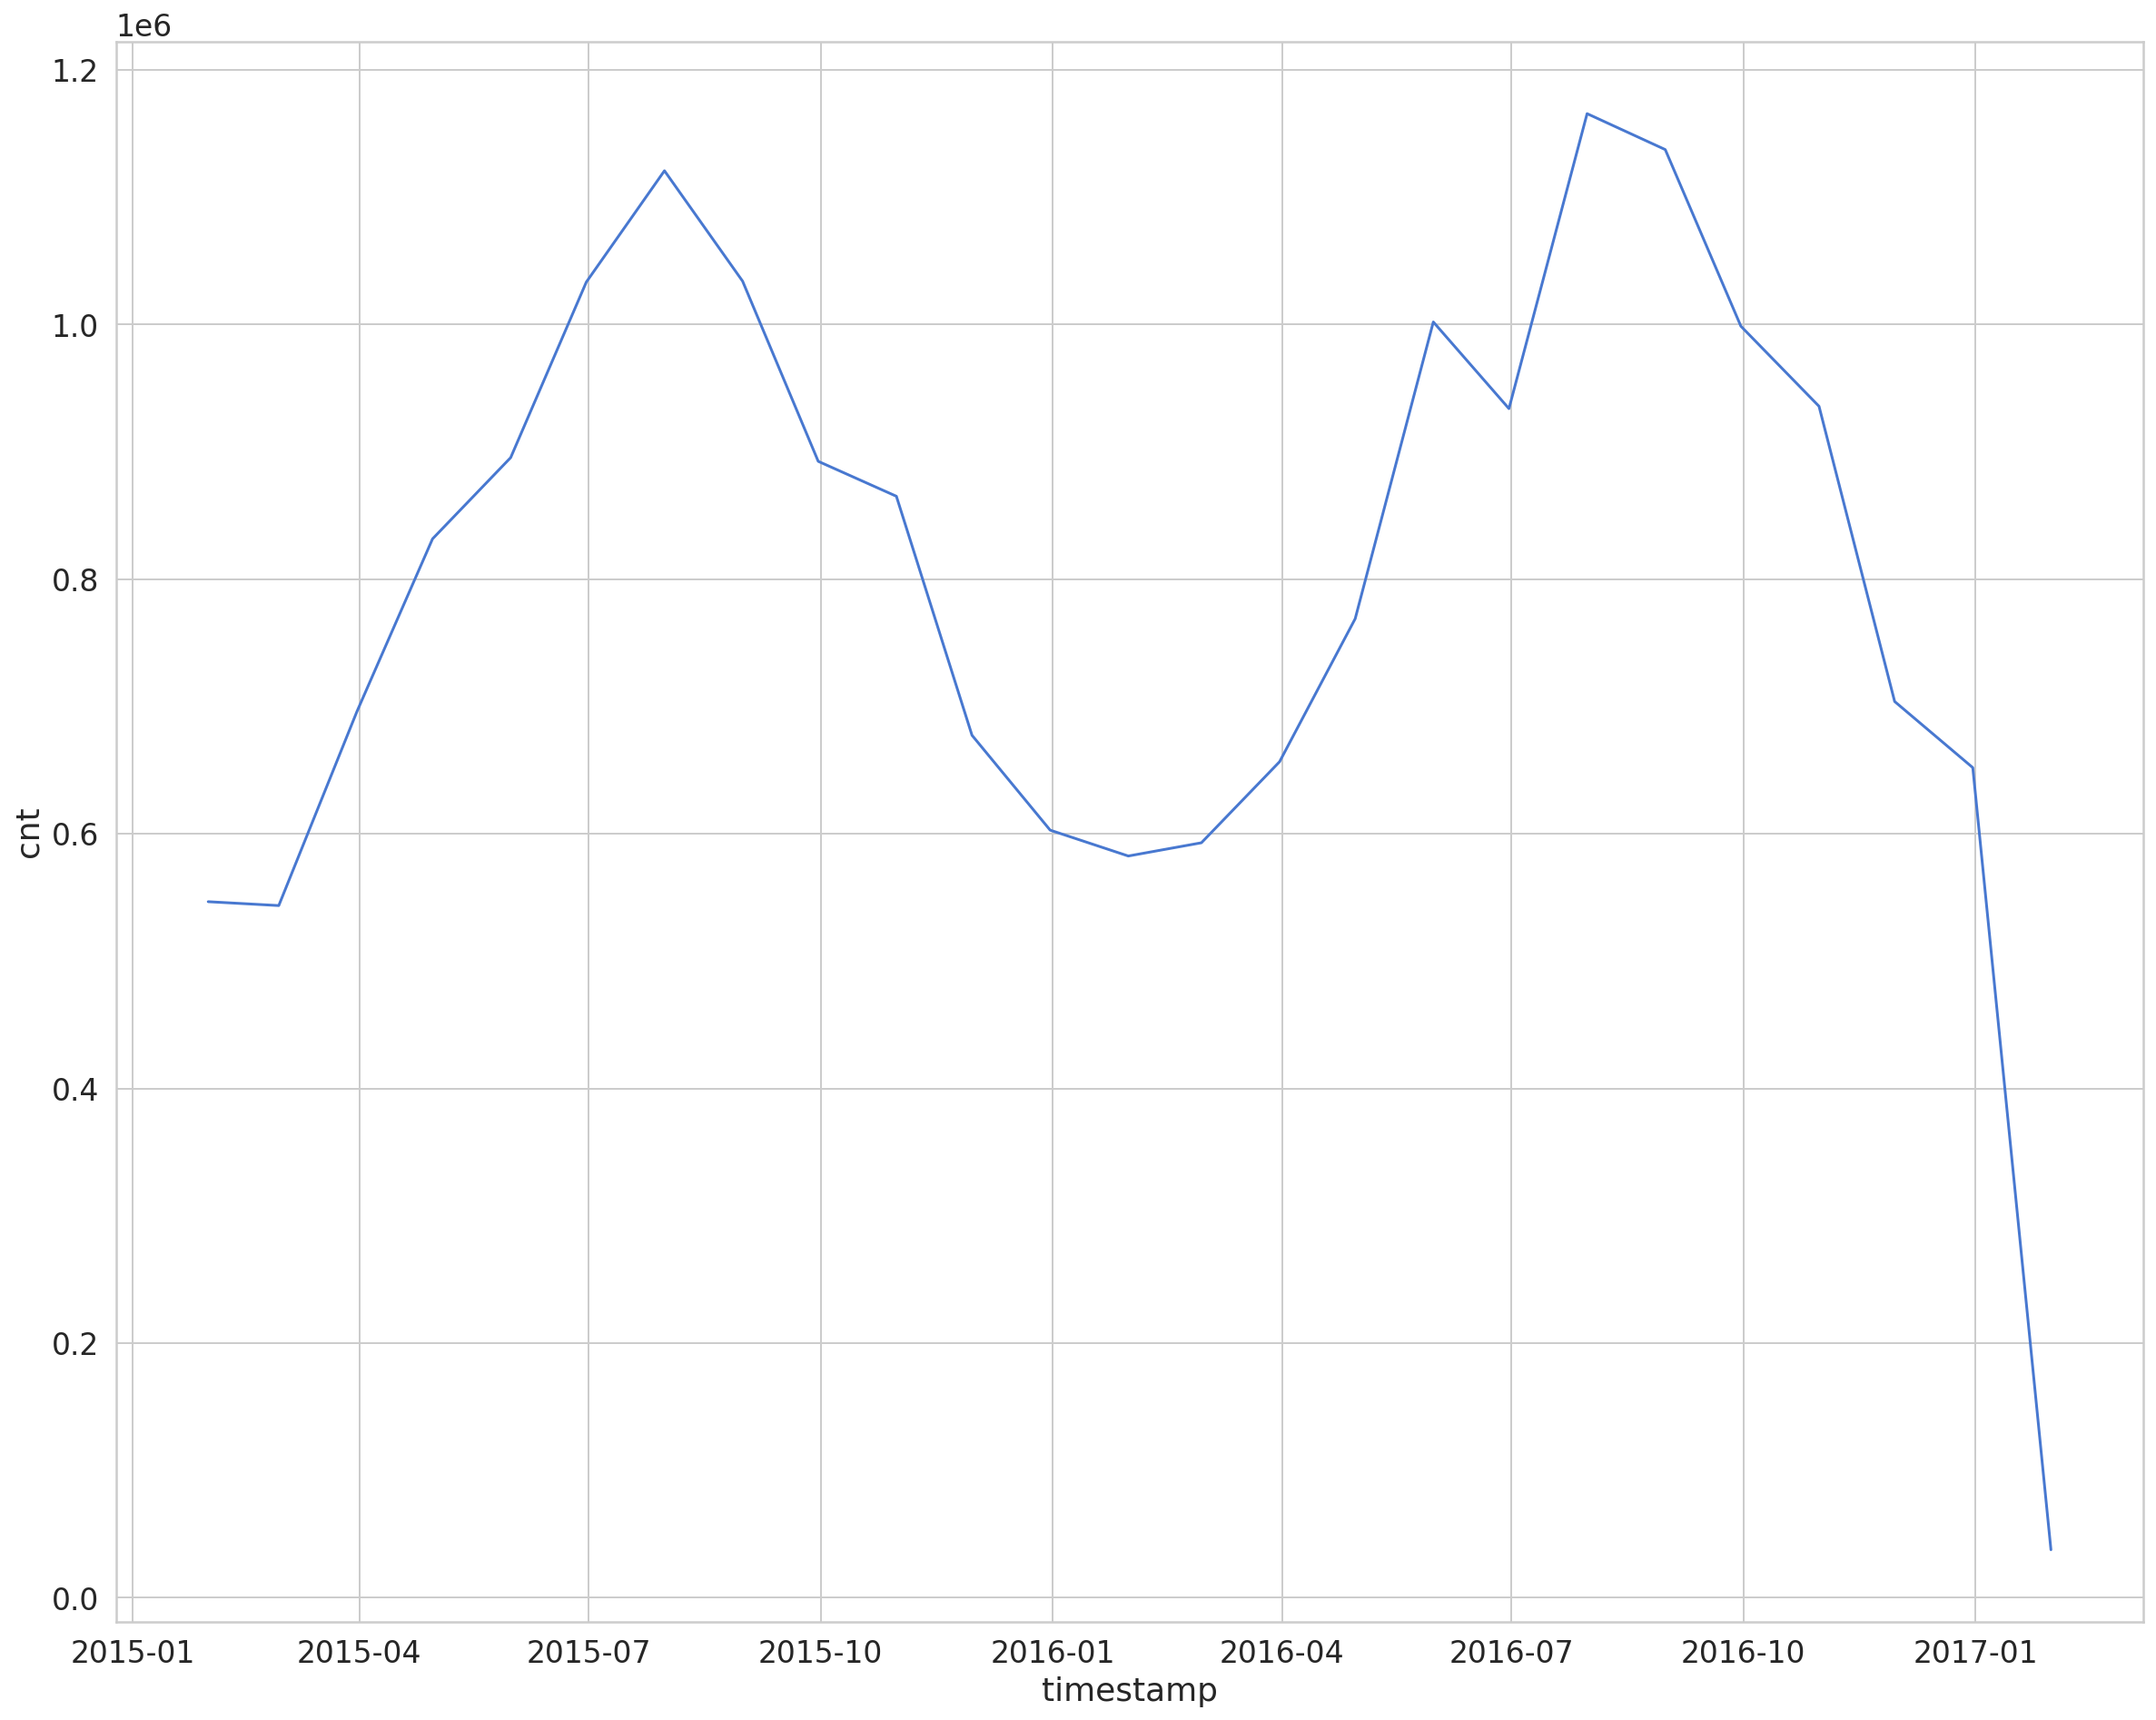

In [9]:
# analyze the seasonal/monthly trends
df_by_month = df.resample("M").sum()
plt.figure(figsize = (20,16))
plt.grid = True
sns.lineplot(x = df_by_month.index, y = 'cnt', data = df_by_month)


3. Bike shares over time (hourly)

It is witnessed that the majority of people at 8 A.M and 18 P.M, which coincides with the time that people commute to work. In addition, it is also notable that the figures starts to increase dramatically from 5a.m to 8 a.m, which is proved by the fact that people start to do exercise during this time.

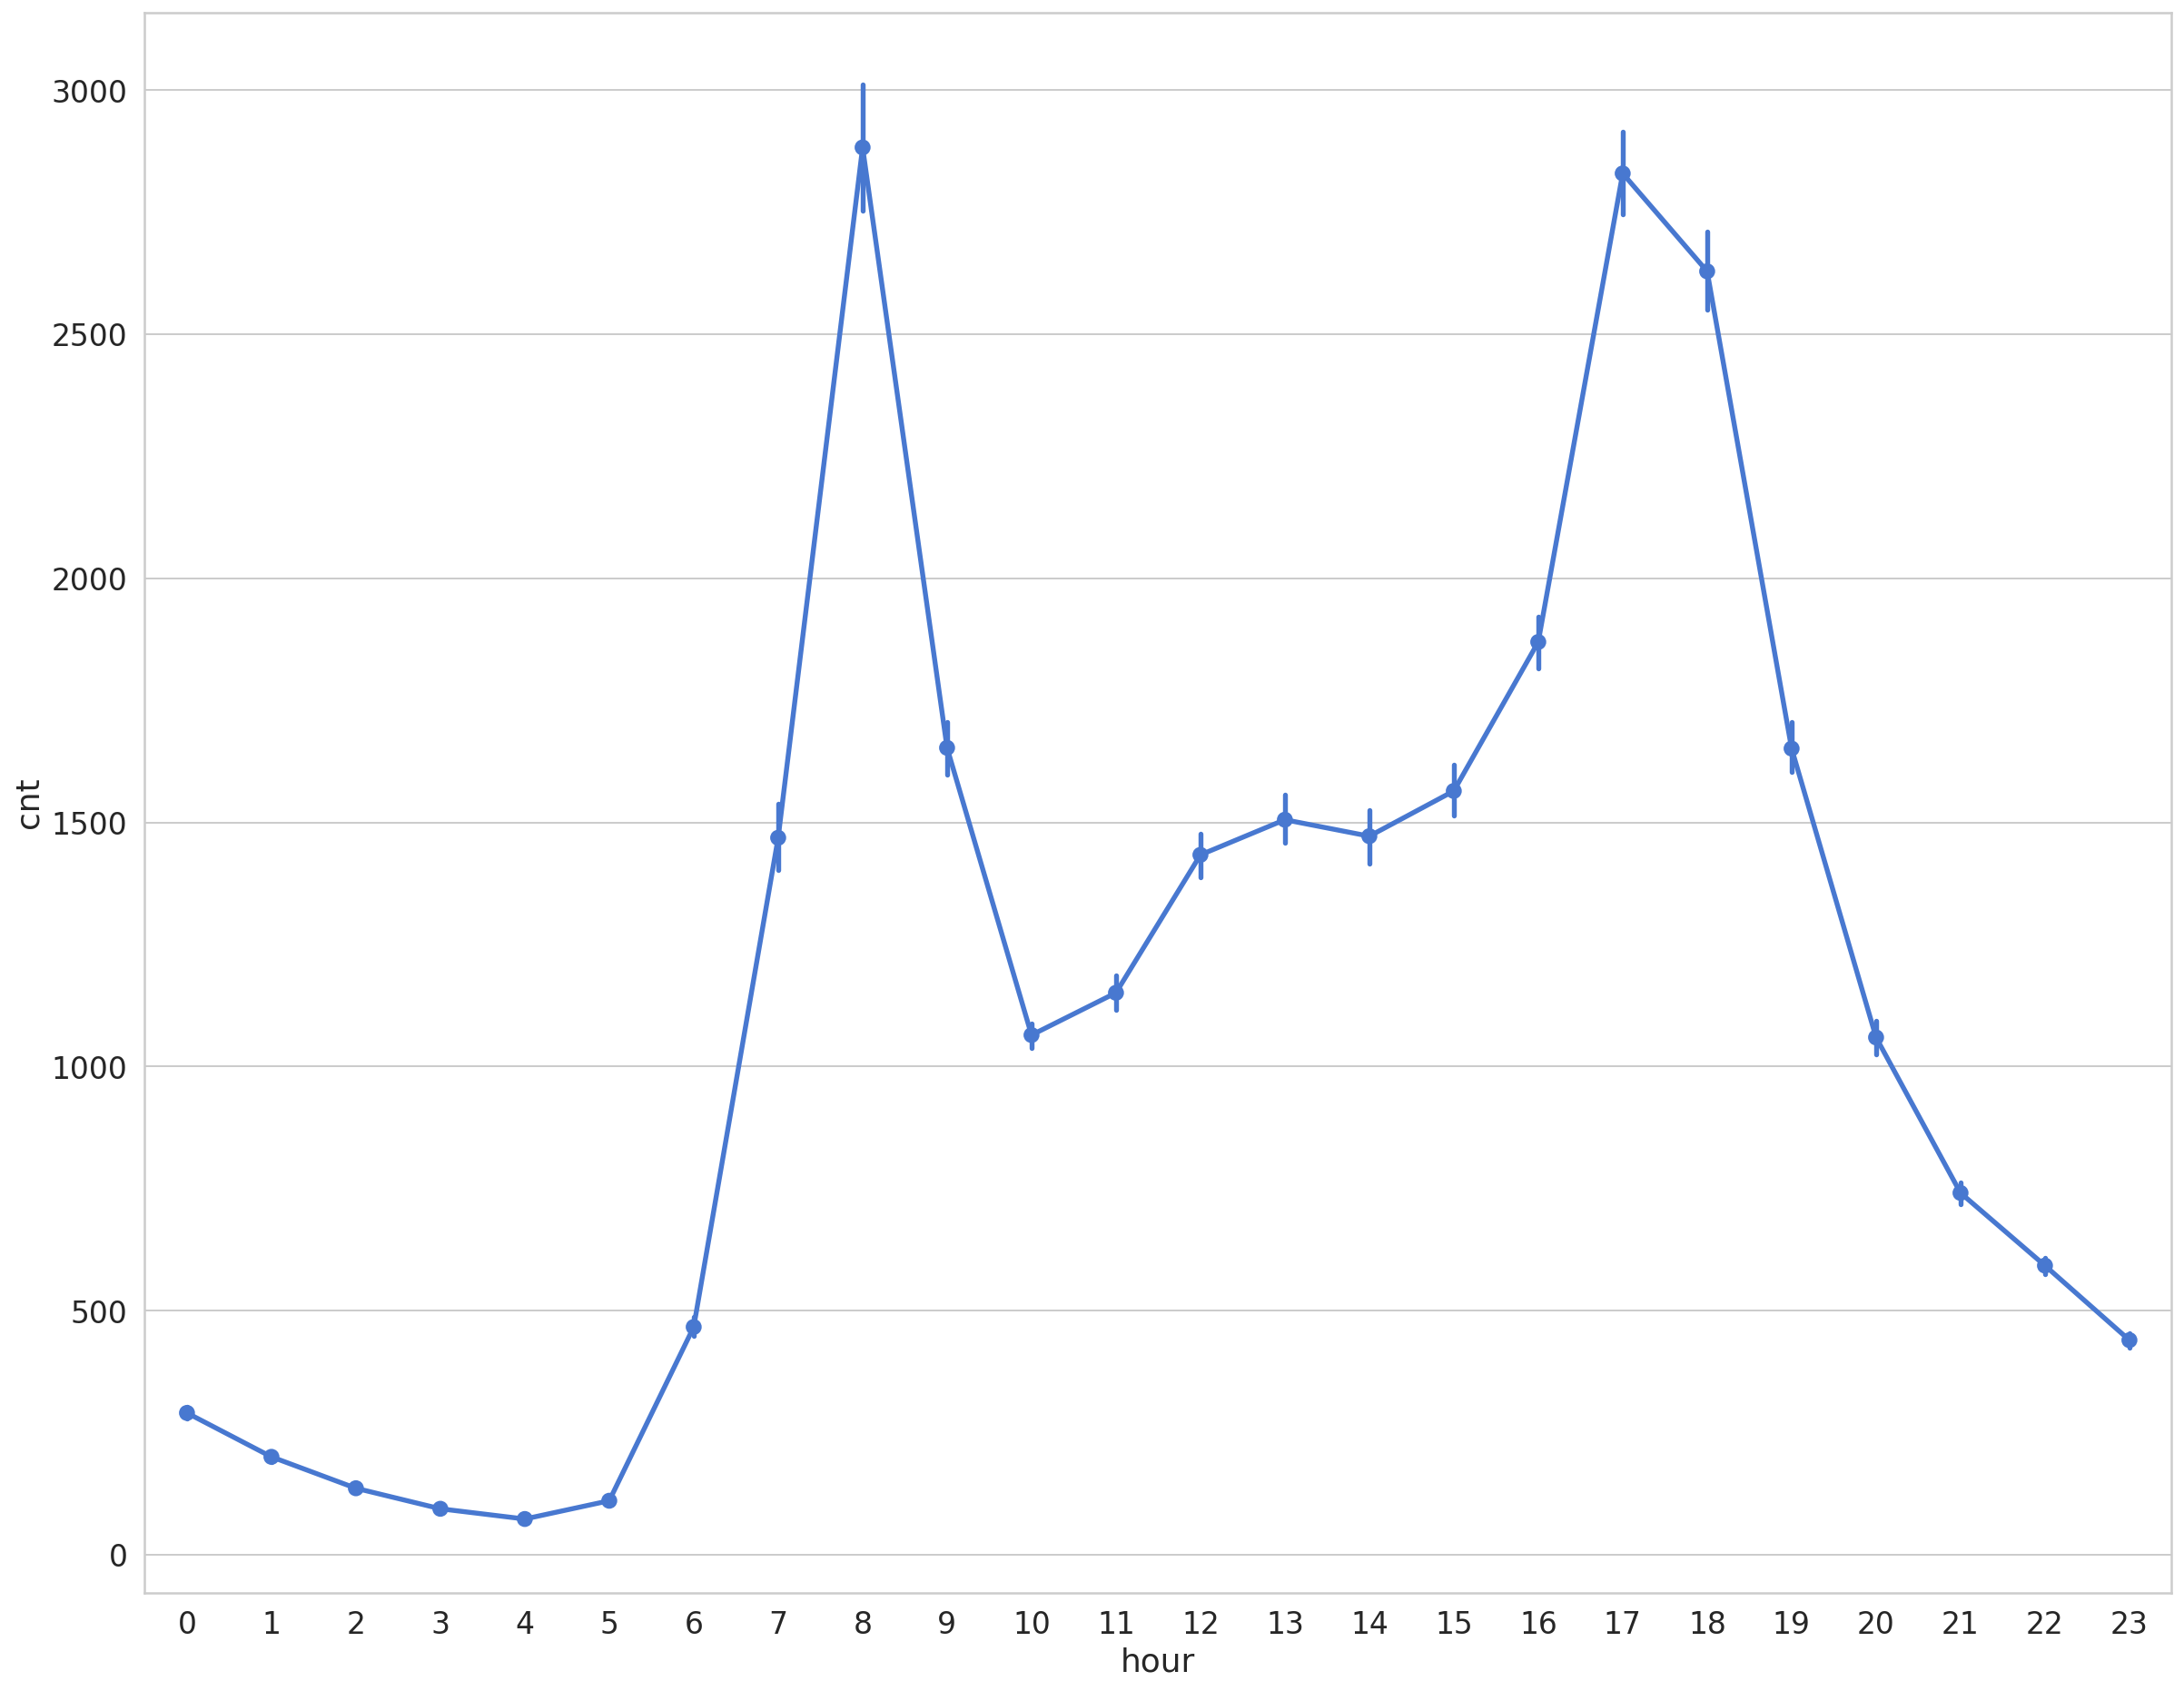

In [10]:
plt.figure(figsize = (20,16))
plt.grid = True
sns.pointplot(x = 'hour', y = 'cnt', data = df)
# 6-10: go to work to school
# evening hour: another spike

The hours with most bike shares differ significantly based on a weekend or not days. Workdays contain two large spikes during the morning and late afternoon hours (people pretend to work in between). On weekends early to late afternoon hours seem to be the busiest.

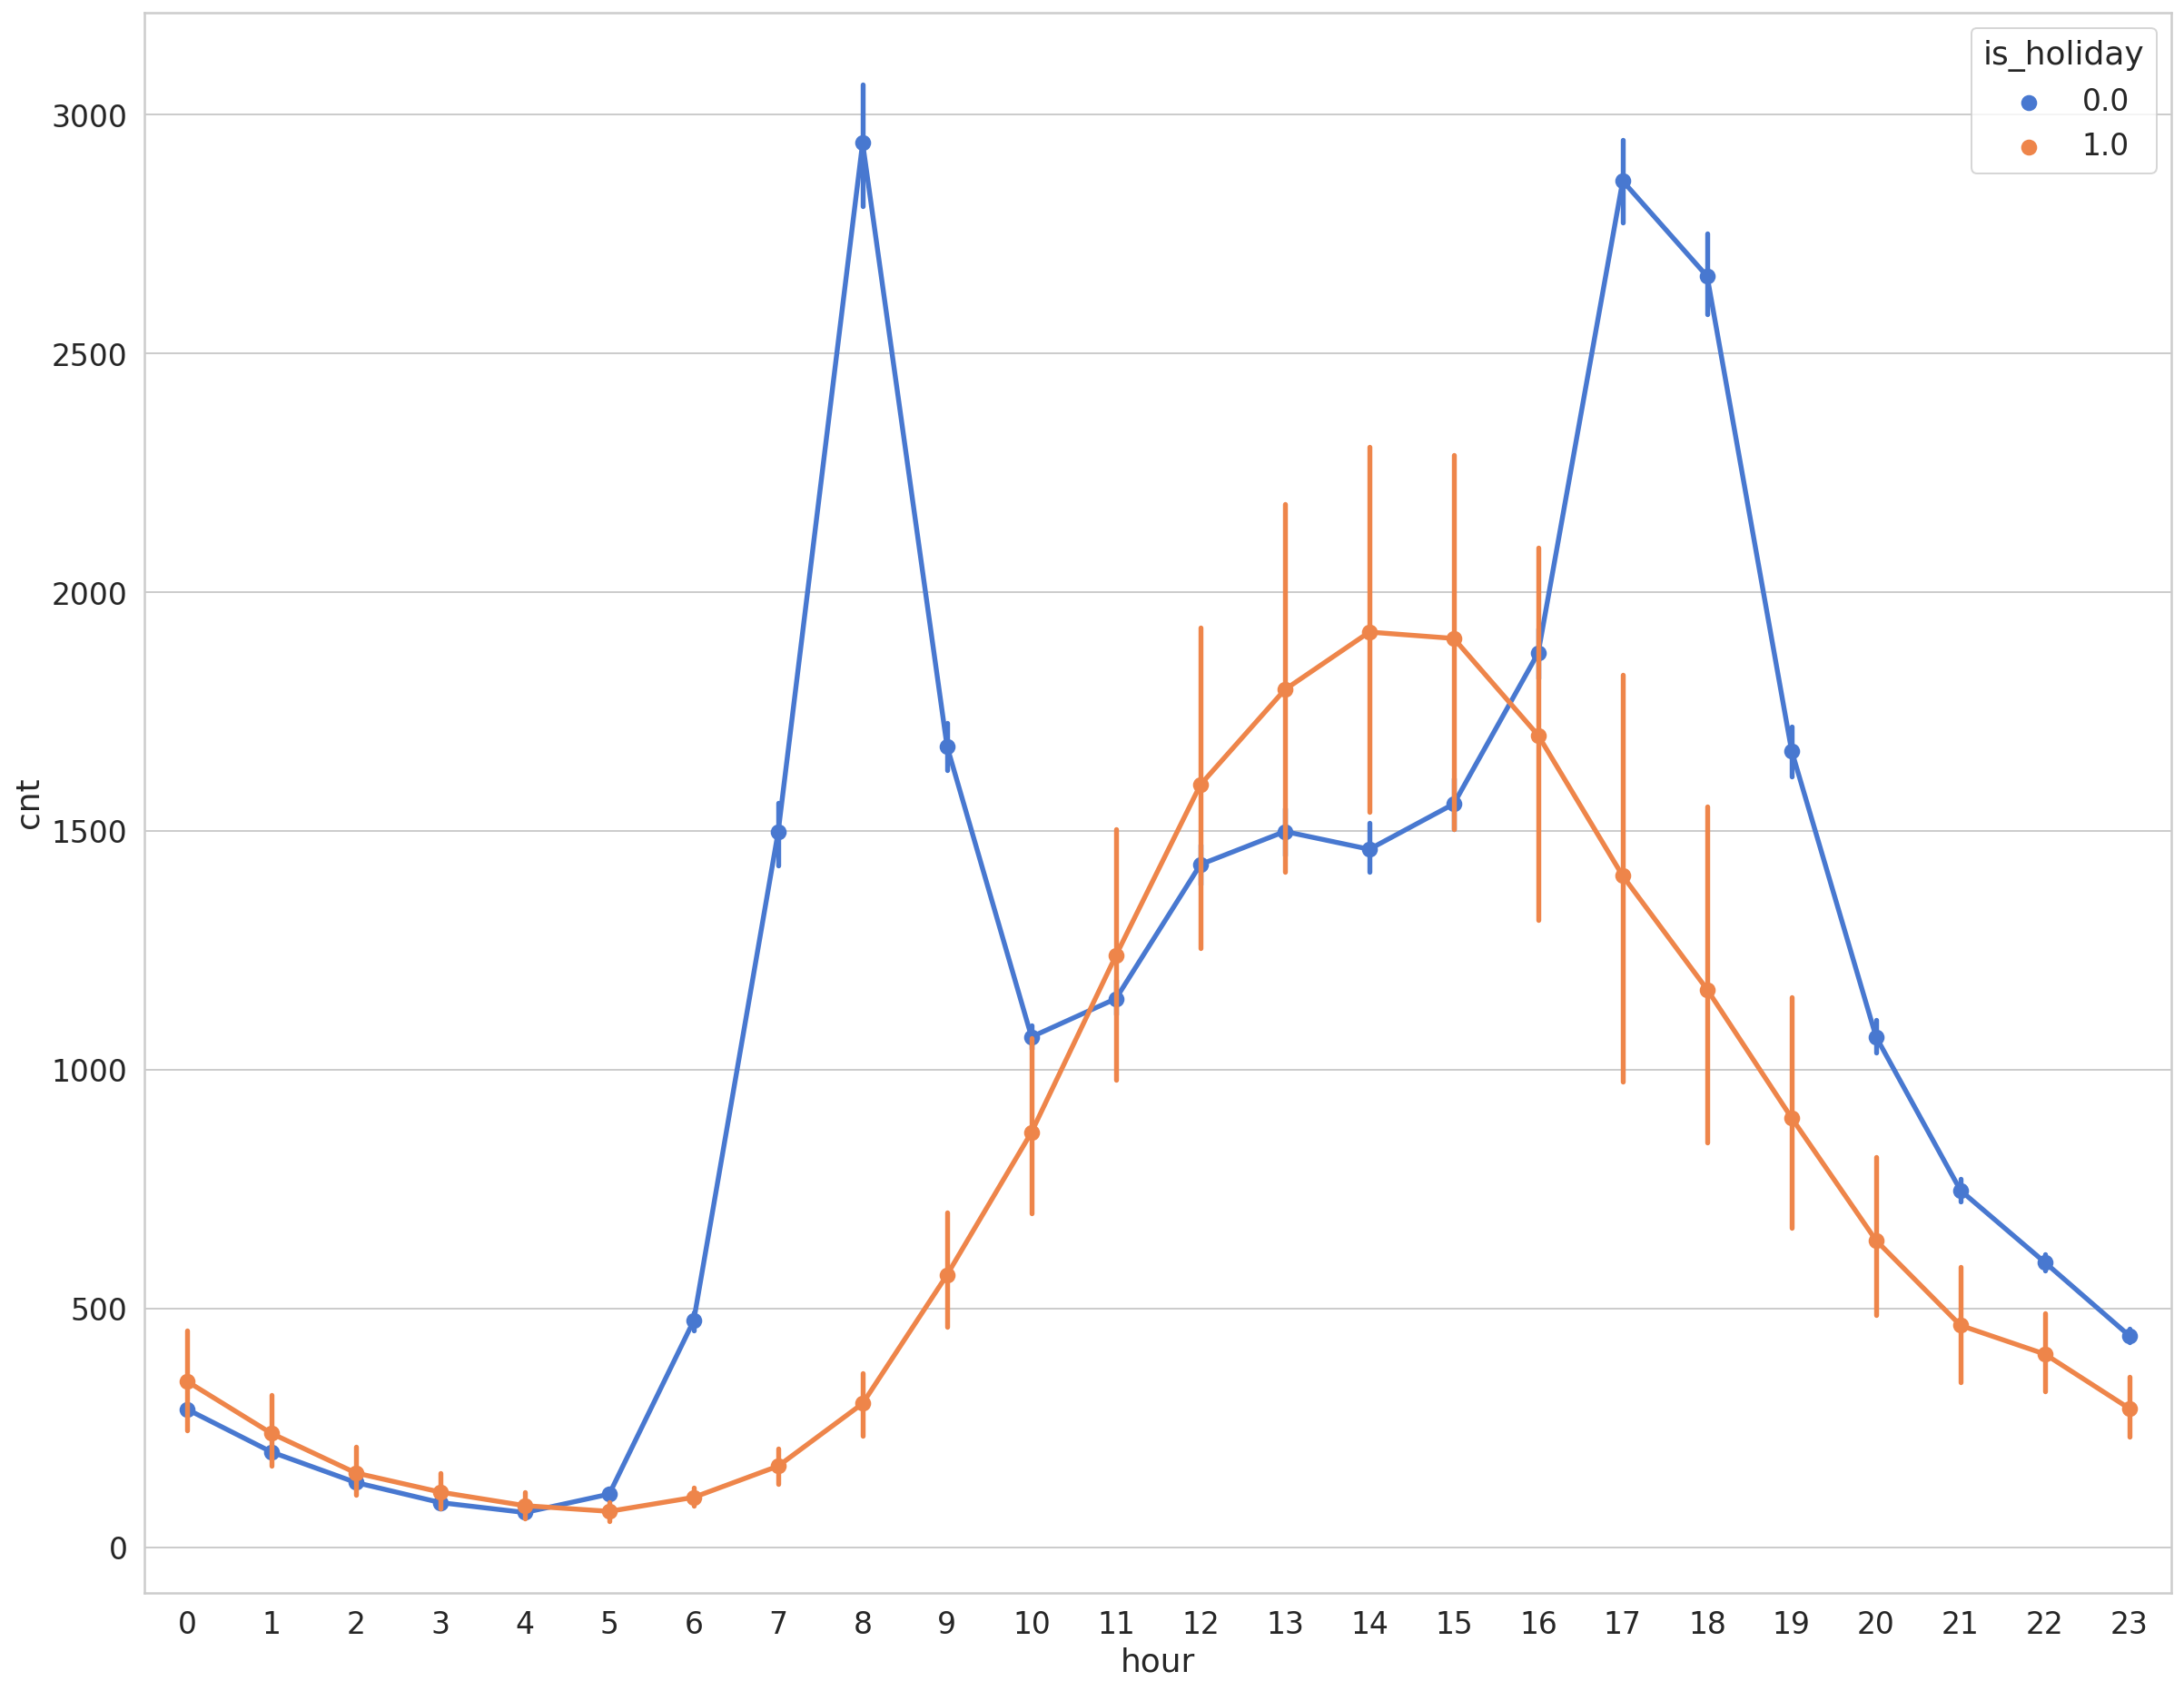

In [11]:
plt.figure(figsize = (20,16))
plt.grid = True
sns.pointplot(x = 'hour', y = 'cnt', data = df, hue = 'is_holiday')

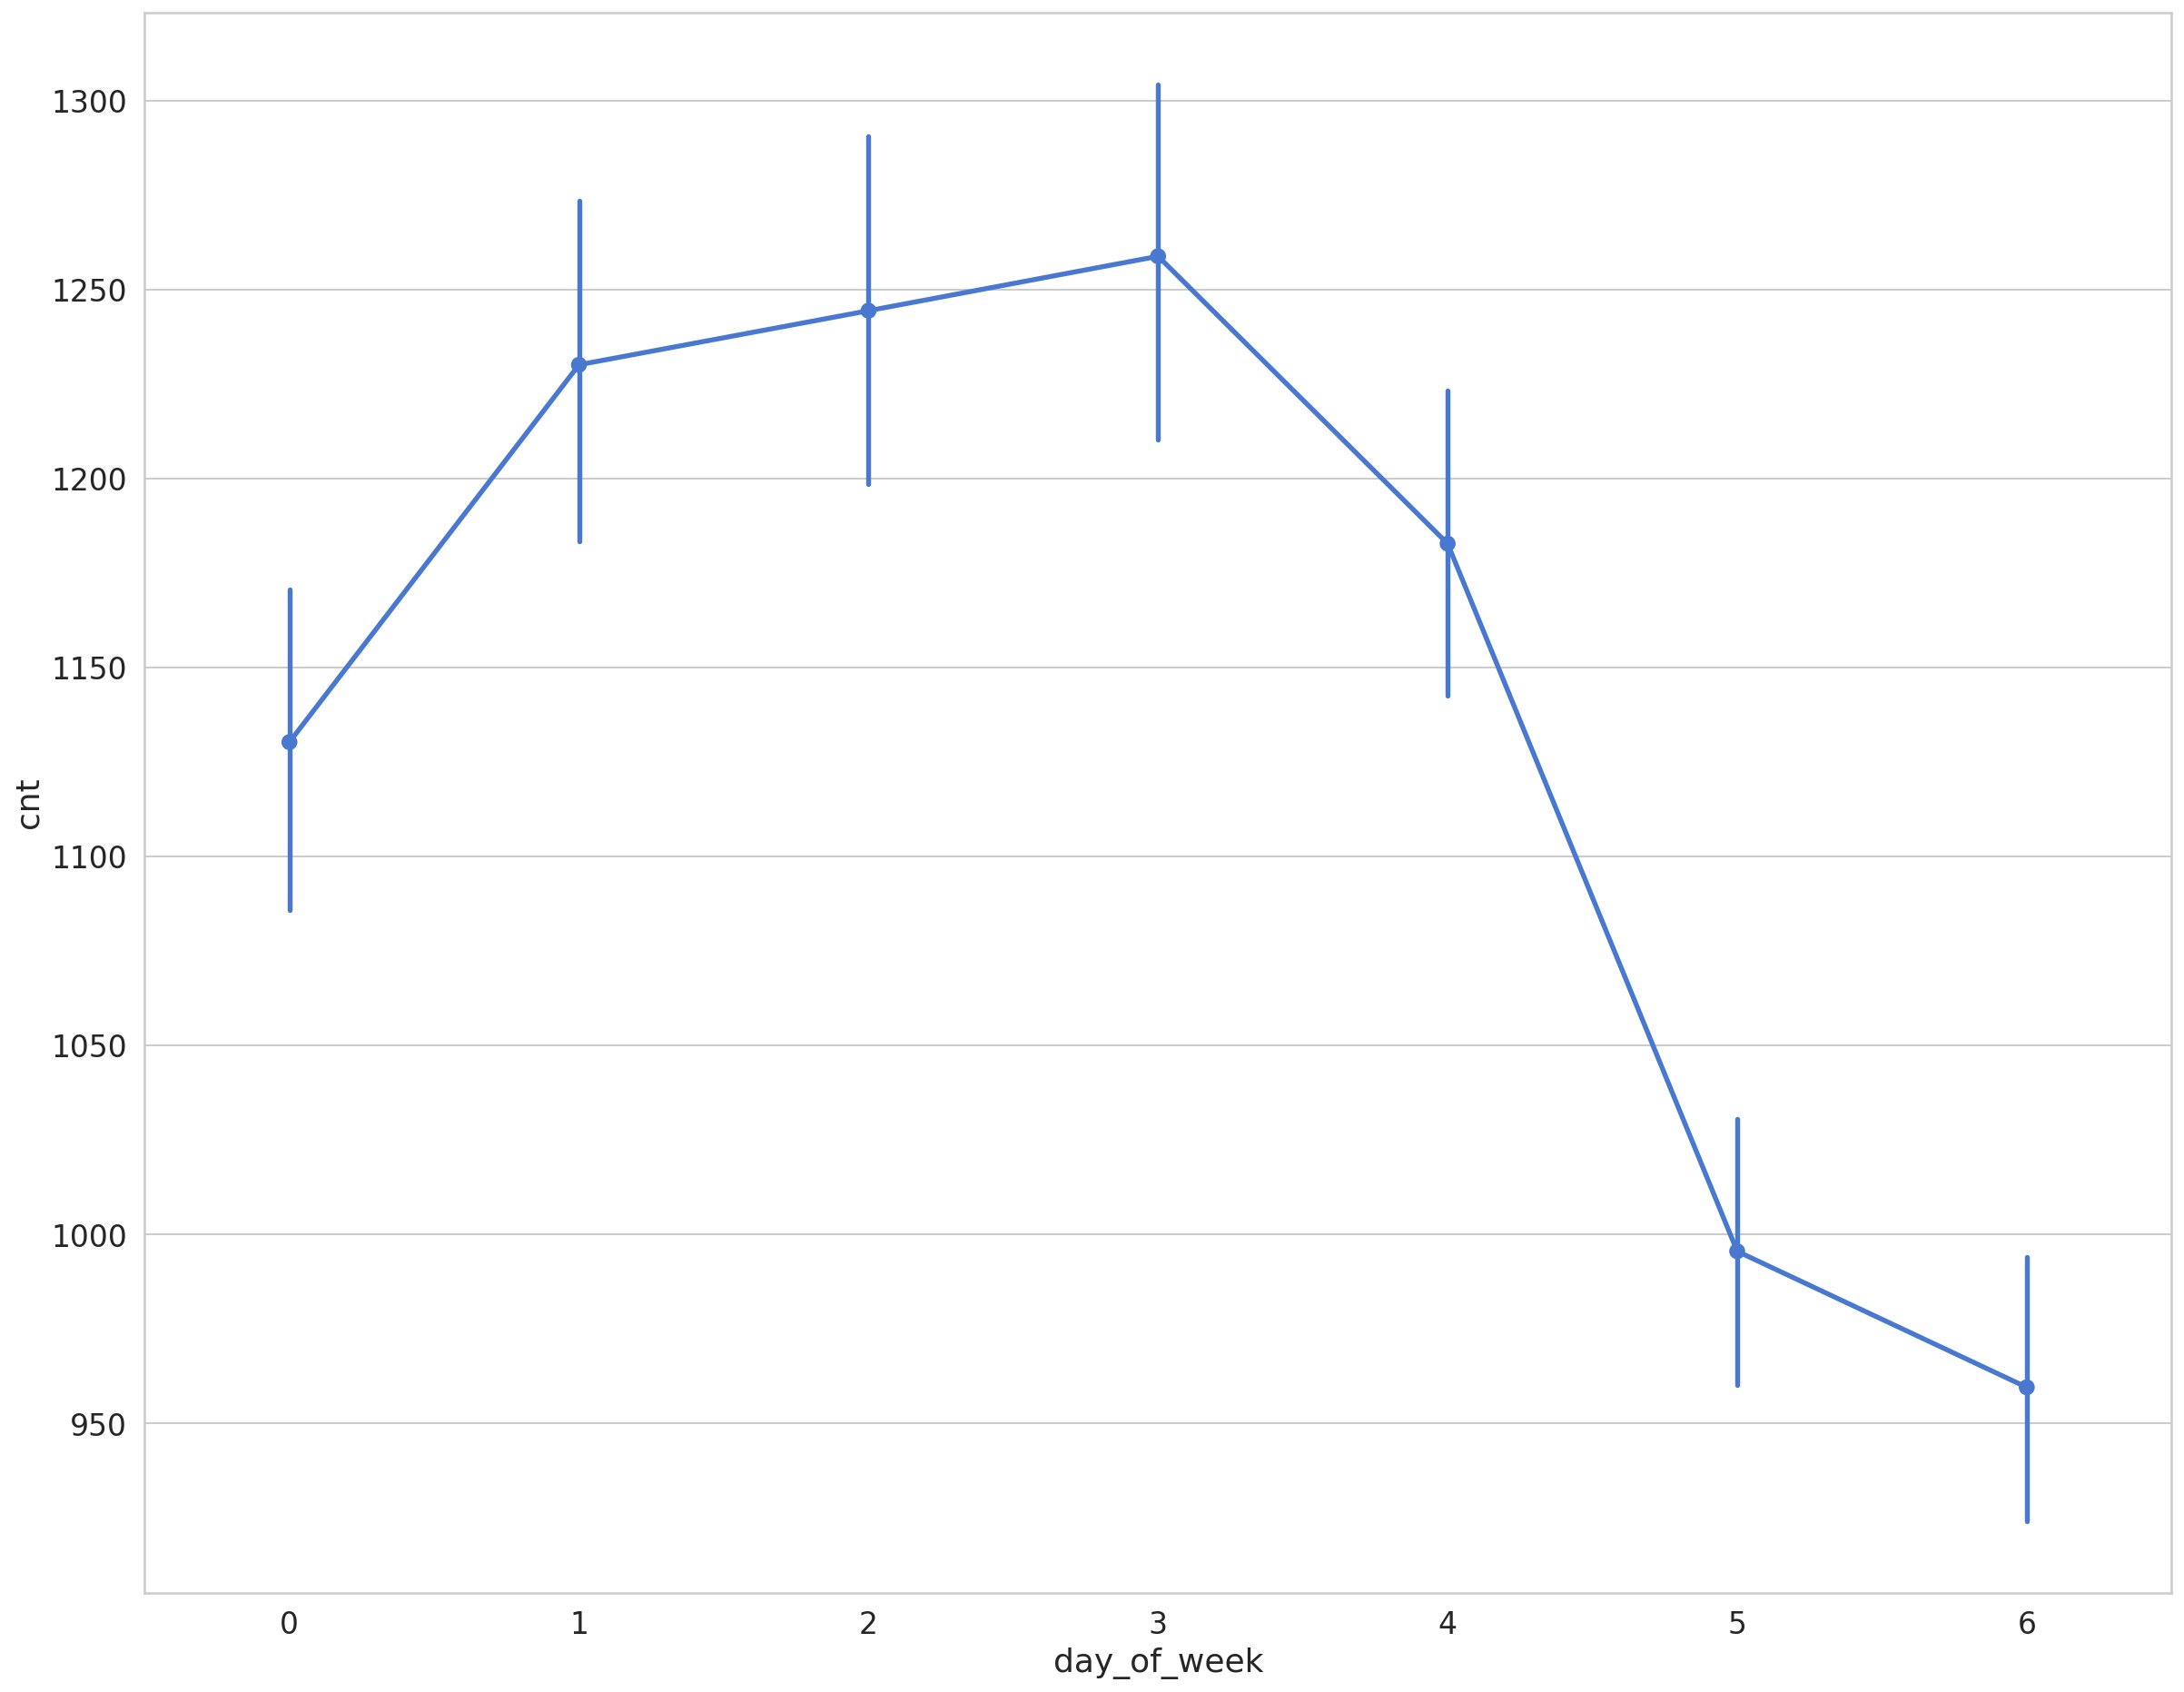

In [12]:
plt.figure(figsize = (20,16))
plt.grid = True
sns.pointplot(x = 'day_of_week', y = 'cnt', data = df)
# more shares during the weekdays, less at the weekends

# Preprocessing

10% data for testing, validation_split = 0.1

In [13]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size: len(df)]
print(train.shape, test.shape)

(15672, 13) (1742, 13)


In [14]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,217,8.0,7.0,90.0,6.0,2.0,0.0,1.0,2.0,3,6,23,10
2016-10-23 04:00:00,150,8.0,7.0,93.0,6.0,2.0,0.0,1.0,2.0,4,6,23,10
2016-10-23 05:00:00,107,8.0,8.0,87.0,4.0,3.0,0.0,1.0,2.0,5,6,23,10


Scaling beforehand

In [15]:
from sklearn.preprocessing import RobustScaler, StandardScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [16]:
# After scaling
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.464876,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,-0.495179,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,-0.497934,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,-0.540634,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,-0.557851,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0,4,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.440771,-0.6250,-0.571429,0.825,-0.818182,2.0,0.0,1.0,2.0,3,6,23,10
2016-10-23 04:00:00,-0.486915,-0.6250,-0.571429,0.975,-0.818182,2.0,0.0,1.0,2.0,4,6,23,10
2016-10-23 05:00:00,-0.516529,-0.6250,-0.476190,0.675,-1.000000,3.0,0.0,1.0,2.0,5,6,23,10


In [17]:
def create_dataset(X, y, time_steps = 1):
  Xs, ys = [], []
  for i in range(len(X) - time_steps):
    v = X.iloc[i: (i+time_steps)].values
    Xs.append(v)
    ys.append(y.iloc[i + time_steps])
  return np.array(Xs), np.array(ys)

In [18]:
TIME_STEPS = 10
X_train, y_train = create_dataset(train, train.cnt, time_steps = TIME_STEPS)
X_test, y_test = create_dataset(test, test.cnt, time_steps= TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15662, 10, 13) (15662,)
(1732, 10, 13) (1732,)


In [19]:
X_train.shape # input is an array of 10 elements, each is 13 columns

(15662, 10, 13)

In [20]:
X_train[0][0].shape # == X_test[0][0].shape = the number of features

(13,)

# First model: Bidirectional model with LSTM

In [21]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units = 128, input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate = 0.2))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1))

In [22]:
model.compile(loss = 'mean_squared_error', optimizer= 'adam')


In [23]:
history = model.fit(X_train, y_train, epochs = 30, batch_size= 32,
                    validation_split = 0.1, shuffle = False) # don't want to interrupt a times series dataset

Epoch 1/30
441/441 [==============================] - 10s 13ms/step - loss: 0.3504 - val_loss: 0.2178
Epoch 2/30
441/441 [==============================] - 5s 10ms/step - loss: 0.0860 - val_loss: 0.0778
Epoch 3/30
441/441 [==============================] - 4s 10ms/step - loss: 0.0513 - val_loss: 0.0658
Epoch 4/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0387 - val_loss: 0.0335
Epoch 5/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0325 - val_loss: 0.0301
Epoch 6/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0282 - val_loss: 0.0354
Epoch 7/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0269 - val_loss: 0.0331
Epoch 8/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0241 - val_loss: 0.0362
Epoch 9/30
441/441 [==============================] - 4s 10ms/step - loss: 0.0231 - val_loss: 0.0280
Epoch 10/30
441/441 [==============================] - 4s 10ms/step - loss: 0.0217 - val_l

The model learns very quickly, and from epoch 5, it has started to become overfit, which can be prevented using callbacks

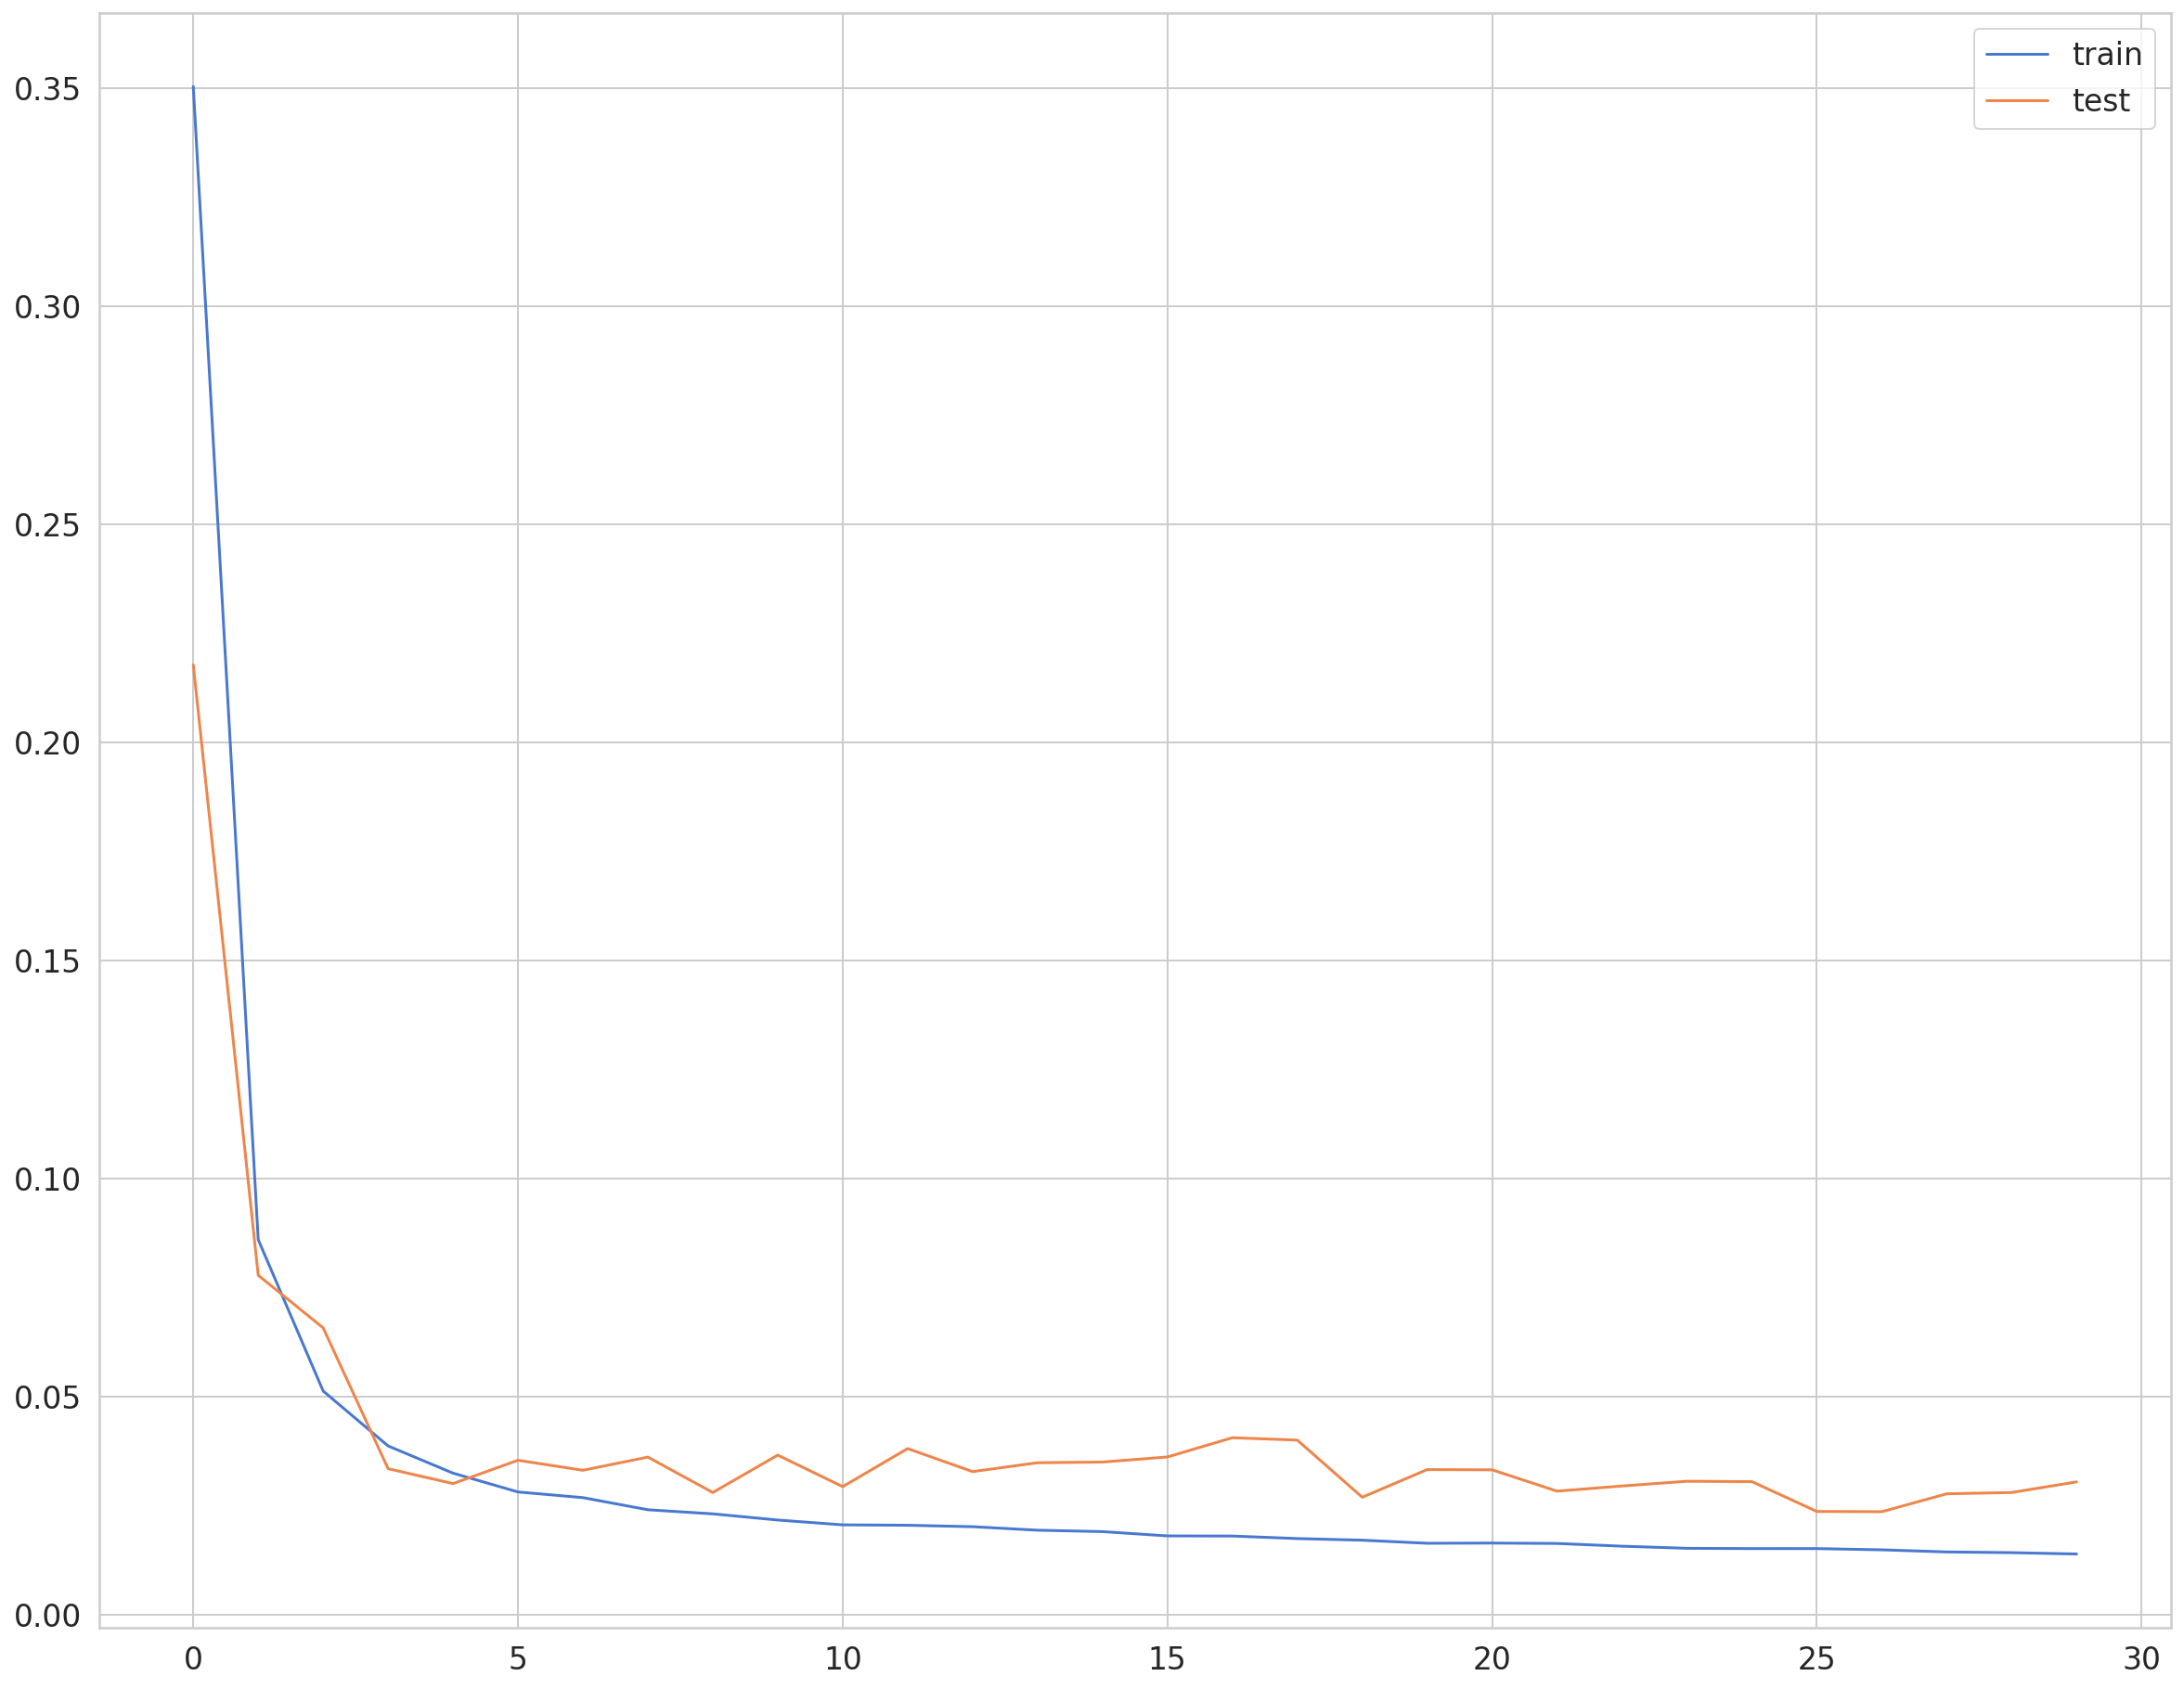

In [24]:
plt.figure(figsize = (20,16))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

In [25]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 5ms/step - loss: 0.0306


0.030582688748836517

In [26]:
y_pred= model.predict(X_test)
y_pred

array([[ 0.4553361 ],
       [ 0.13231614],
       [-0.08904822],
       ...,
       [-0.30056843],
       [-0.38617814],
       [-0.45513046]], dtype=float32)

In [27]:
y_train, cnt_transformer.inverse_transform(y_train.reshape(-1,1)) # reshape -1,1 or 1,-1 is the same

(array([-0.22658402, -0.08953168,  0.00344353, ..., -0.51652893,
        -0.51652893, -0.47107438]), array([[528.],
        [727.],
        [862.],
        ...,
        [107.],
        [107.],
        [173.]]))

In [28]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

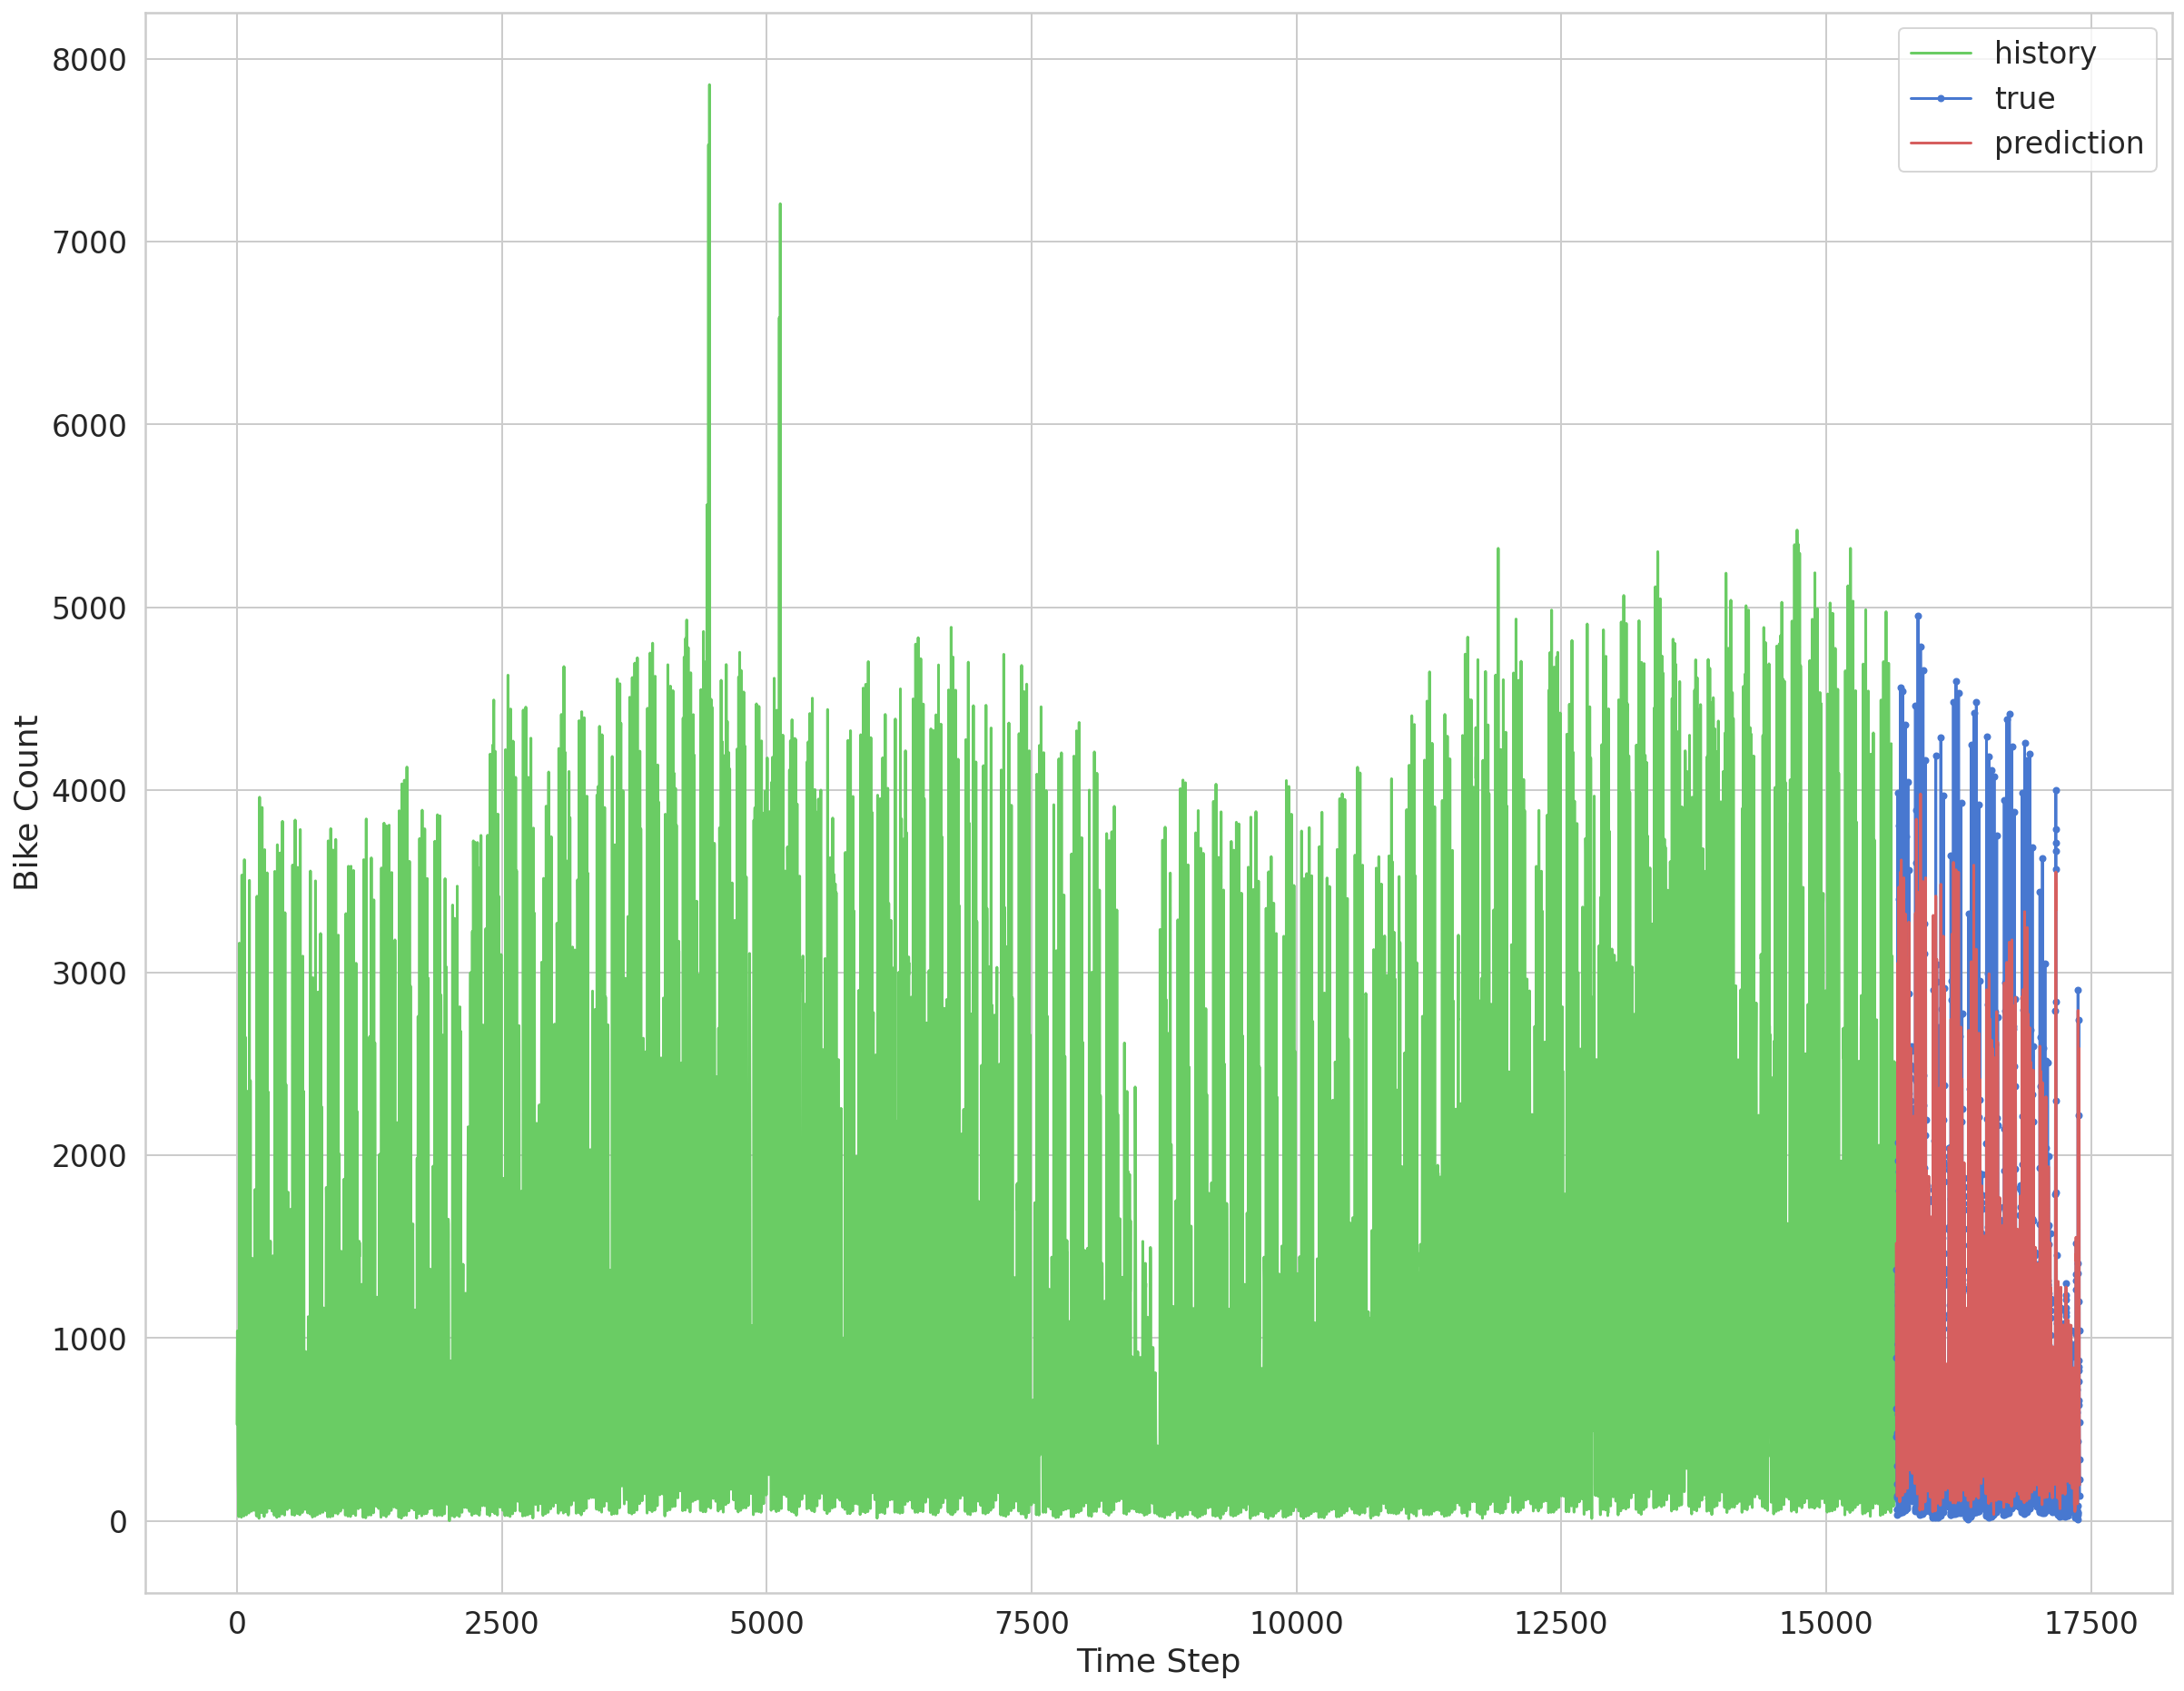

In [29]:
plt.figure(figsize = (20,16))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

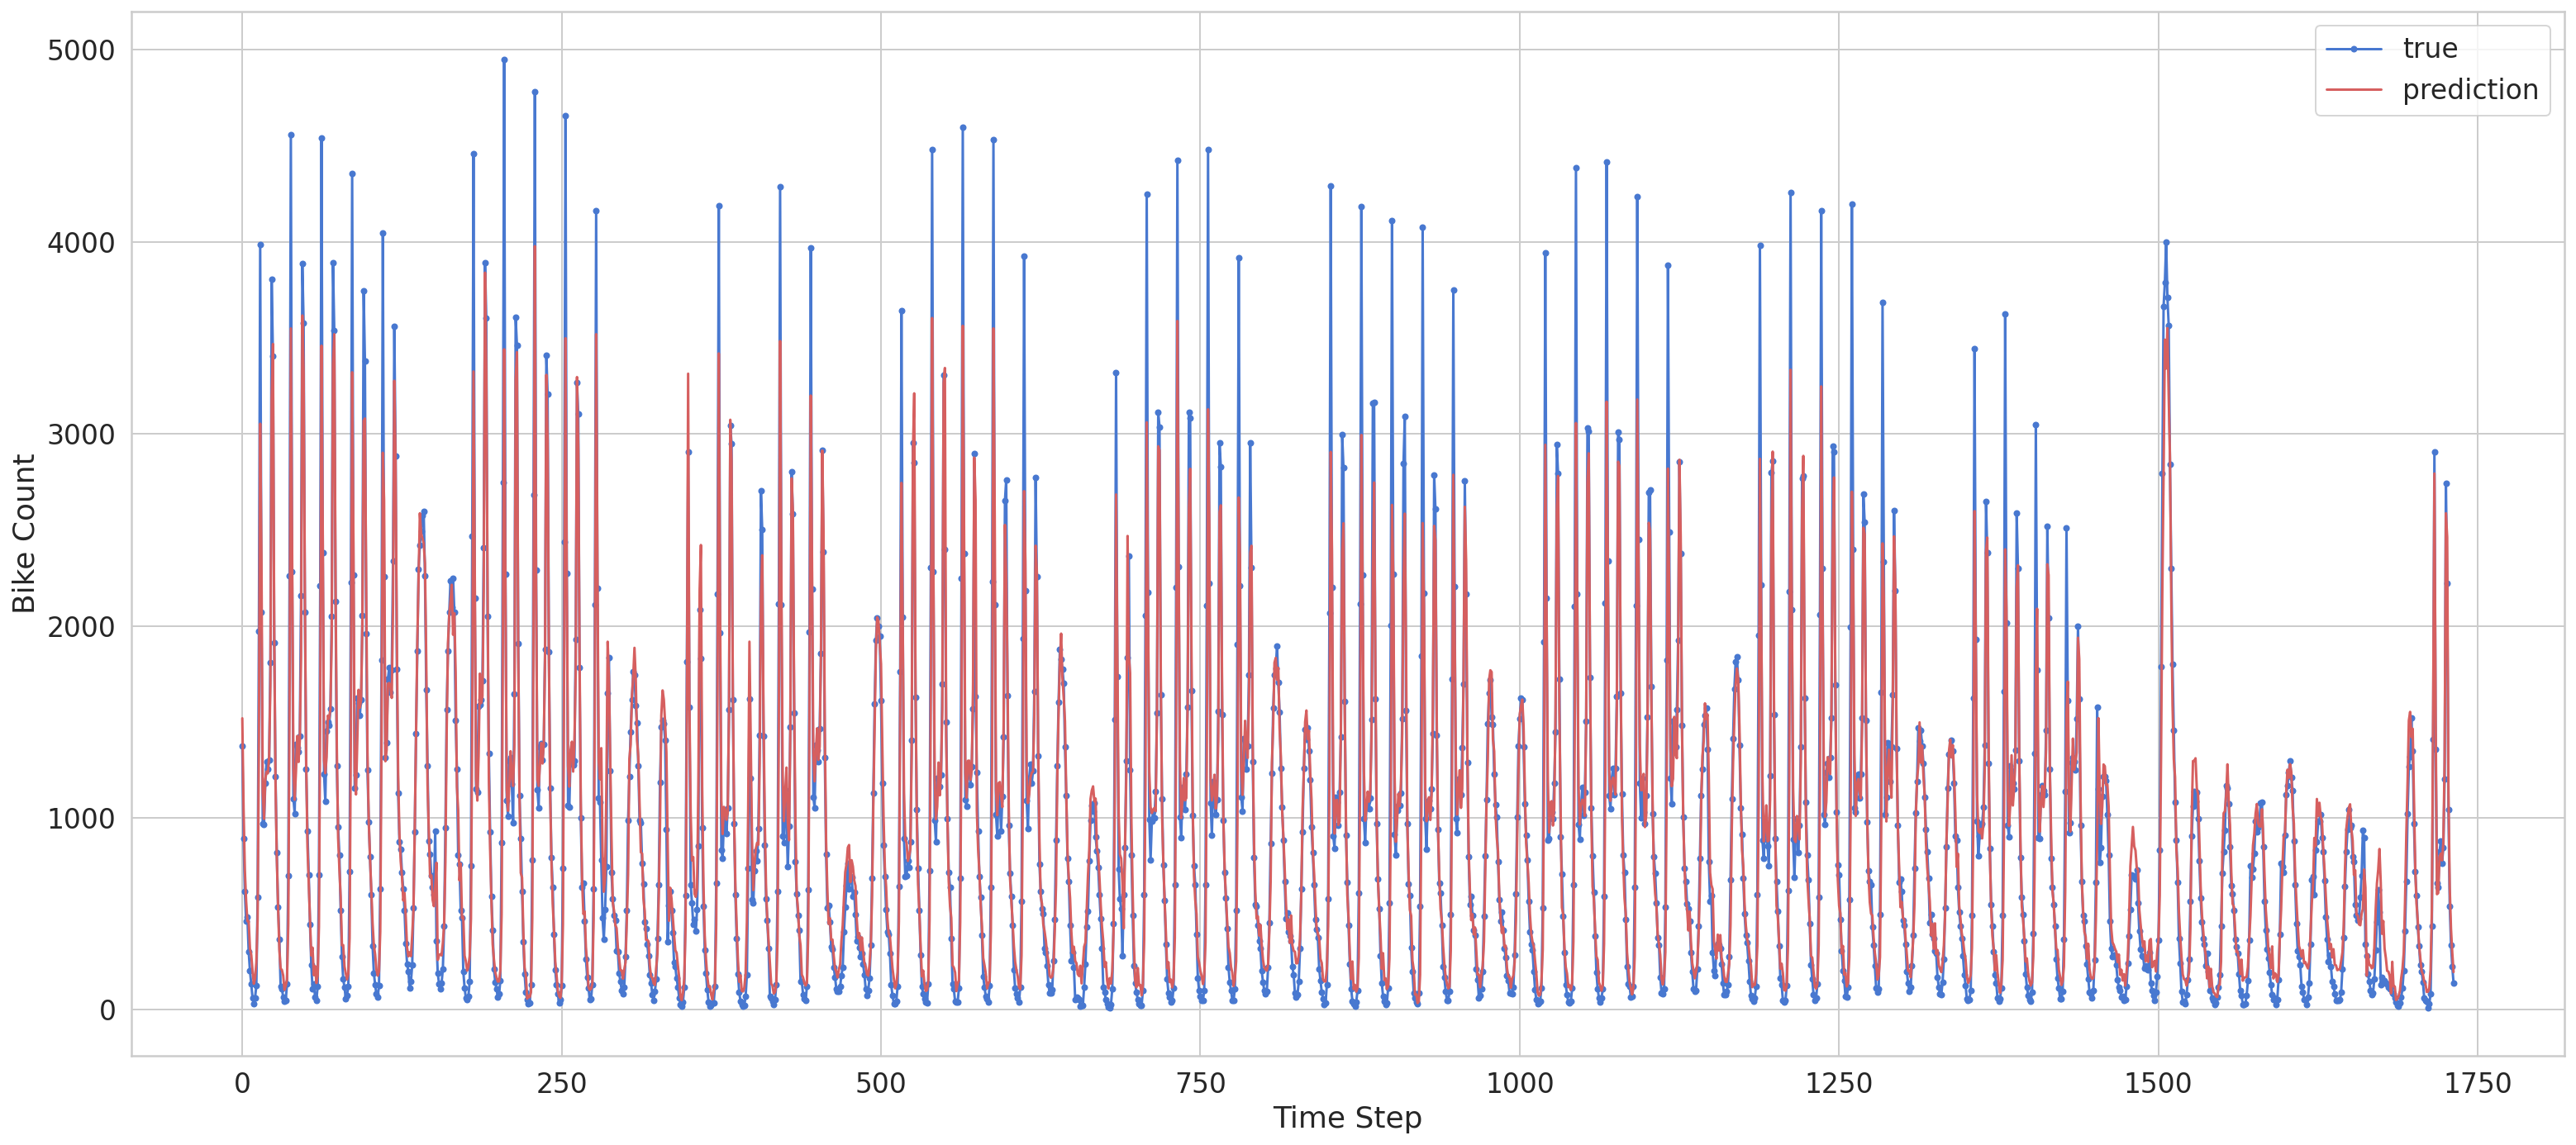

In [31]:
plt.figure()
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.tight_layout()
plt.savefig("Prediction.png")
plt.show();